In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition


First, let's load up a set of images we want to compress using PCA.  For this, we'll use tensorflow, just because it's pretty standard.

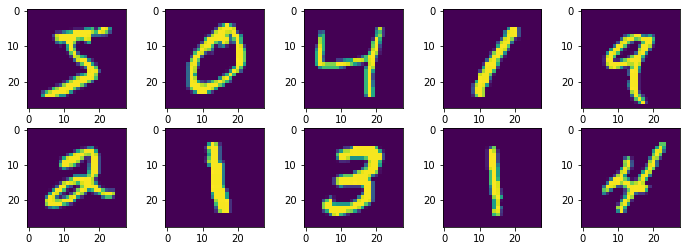

In [55]:
import tensorflow
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
images = x_train.reshape(x_train.shape[0], -1)

plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].reshape((28,28)))

Each of those images is a 784-dimensional vector.   But there's lots of redundancy in that vector (nearby pixels tend to have similar values; some pixels are pretty much never used; things like that).

So, let's compress that down to a smaller number of values.  PCA is a linear compression, in that all it's going to do is multiply your data by a Cx784 matrix, so you'll just have C values instead of 784 values.  In particular, PCA finds the matrix where if you compress the data and then uncompress it (by multiplying by the inverse of C), then your final result will have the minimum mean-squared error.

Here's how we do this:

In [72]:
pca = sklearn.decomposition.PCA(n_components=20)
pca.fit(images)

PCA(n_components=20)

This will now compress 784 values down to 20 values.

Why did we pick 20 values?  Well, more is better but there are diminishing returns.  You can plot how important each of those 20 values is:

Text(0, 0.5, 'importance for the reconstruction')

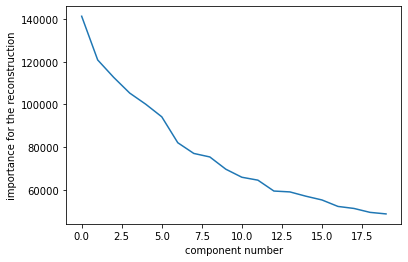

In [73]:
plt.plot(pca.singular_values_)
plt.xlabel('component number')
plt.ylabel('importance for the reconstruction')

As you can see, as we add more components, each component is less and less important for accurate reconstruction.

So, how do we use this system for compression?  Let'd compress the first 10 images, then uncompress them and see what they look like.

In [74]:
compressed = pca.transform(images[:10])
print(compressed)

[[ 123.93258871 -312.67426263  -24.51405031 -555.7579601   -27.29664387
  -232.4762629   233.99612147  159.80003383 -363.51468289  198.43416892
   197.49604464 -254.05226161 -113.5125691   749.30395898  219.23611552
    -4.81879798  330.57964839  309.1520605   276.70865495  165.09841925]
 [1011.71837603 -294.85703823  596.33956058 -460.76619559 -827.2751987
  -181.95046748  -45.02059528 -104.96886123   40.45895032  150.98228552
  -286.48844627 -107.33515237 -319.26104768   90.84973182 -238.16236562
  -162.37653803  -53.55871458   38.94672934   52.63621091 -102.83827759]
 [ -51.84960803  392.1731518  -188.50974627  521.01134363 -306.68071028
    -1.83532789 -859.0467628   368.59241958 -114.54566334 -178.50477509
   450.5459405  -158.87052028  186.9665736   109.24744851 -144.71877647
  -191.24604857  169.77051001 -122.25497504   -9.43145191 -435.06689505]
 [-799.12703654 -607.19721804  273.6512431   105.87823408   -1.85321247
   699.65471539 -473.71285654  -67.321015    302.73117715   11

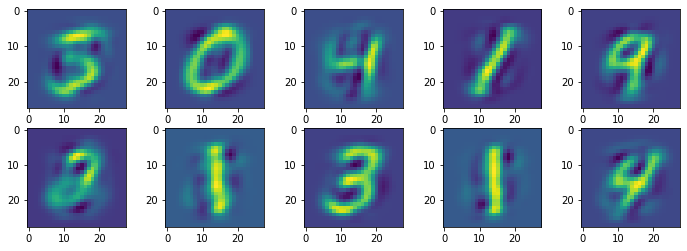

In [75]:
uncompressed = pca.inverse_transform(compressed)

plt.figure(figsize=(12,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(uncompressed[i].reshape((28,28)))

That seems to capture a fair bit of the images!  If you use too few components, then the reconstructions will be really bad.  If you use as many components are the original vector size, then the reconstructions will be perfect.  But 20 seems like a good number for this data set.